# Import packages and Pre-define func

In [1]:
import csv
import numpy as np
import pandas as pd
import pip

def pip_install(module):
    pip.main(['install', module])

# pip_install('scipy')
# pip_install('matplotlib')

In [2]:
def prepare_data():
    raw_data = pd.read_csv('../../data/trade.csv')
    # count the number of vipno and pluno
    vip_set = set(raw_data.vipno)
    n_vip = len(vip_set)
    plu_set = set(raw_data.pluno)
    n_plu = len(plu_set)
    
    # construct the data matrix of the trade
    vipno = list(vip_set)
    pluno = list(plu_set)
    trade_mat = pd.DataFrame(np.zeros([n_plu, n_vip]), index=pluno, columns=vipno)
    l = len(raw_data)
    for i in range(l):
        p = raw_data.loc[i, 'pluno']
        v = raw_data.loc[i, 'vipno']
        a = raw_data.loc[i, 'amt']
        trade_mat.at[p, v] += a
        
    # apply round
    trade_mat.apply(np.round)
    trade_mat = trade_mat.astype('int64') # it depends
    return trade_mat, vipno, pluno, n_vip, n_plu

# Plot silhouette function

In [3]:
# get the data for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

trade_mat, vipno, pluno, n_vip, n_plu = prepare_data()
X = trade_mat.values
X = X.transpose()
# standarize
scaler = StandardScaler()
X = scaler.fit_transform(X)

298


/Users/jiangyukai/Developer/DataMing-HW/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# (a) Silhouette coefficient - k cluster plot

In [4]:
from scipy.interpolate import interp1d
from sklearn.cluster import DBSCAN

def cluster_eva(X, eps, min_samples=2):
    cluster_labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
    cluster_num = len(set(cluster_labels))
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For eps =", eps, ", min_samples =", min_samples,
          "The average silhouette_score is :", silhouette_avg)
    print("cluster number =", cluster_num)
    return silhouette_avg, cluster_labels

In [12]:
# print(len(X))
# print(X[1,:])
dist = np.sqrt(np.sum(np.power(X[1]- X[2], 2)))
print("Calculate a random distance: ", dist)

Calculate a random distance:  60.57628662712961


In [13]:
ks = []
y = []
labels = []
for eps in range(20, 140, 10):
    ks.append(eps)
    sil_avg, cluster_labels = cluster_eva(X, eps)
    y.append(sil_avg)
    labels.append(cluster_labels)

For eps = 20 , min_samples = 2 The average silhouette_score is : -0.1943073408475275
cluster number = 2
For eps = 30 , min_samples = 2 The average silhouette_score is : -0.026503556013489398
cluster number = 2
For eps = 40 , min_samples = 2 The average silhouette_score is : 0.08712849271507551
cluster number = 2
For eps = 50 , min_samples = 2 The average silhouette_score is : 0.2094984819671238
cluster number = 2
For eps = 60 , min_samples = 2 The average silhouette_score is : 0.27982027130825804
cluster number = 2
For eps = 70 , min_samples = 2 The average silhouette_score is : 0.33875563308983186
cluster number = 2
For eps = 80 , min_samples = 2 The average silhouette_score is : 0.4069508182311087
cluster number = 2
For eps = 90 , min_samples = 2 The average silhouette_score is : 0.42974201504628934
cluster number = 2
For eps = 100 , min_samples = 2 The average silhouette_score is : 0.4578645031901576
cluster number = 2
For eps = 110 , min_samples = 2 The average silhouette_score is 

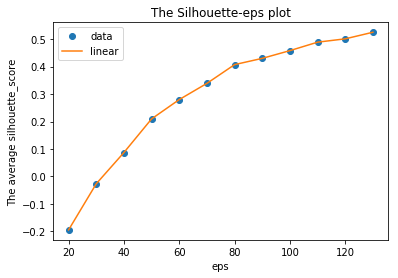

In [14]:
f = interp1d(ks, y)

xnew = ks.copy()
plt.plot(ks, y, 'o', xnew, f(xnew), '-')
plt.legend(['data', 'linear'], loc='best')
plt.xlabel("eps")
plt.ylabel("The average silhouette_score")
plt.title("The Silhouette-eps plot")
plt.show()

In [8]:
# print(labels[2])

[-1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0
  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


# (b) Test with LSH

In [9]:
from lshash.lshash import LSHash

print("Start test with lshash...")
e = 0.01
lsh = LSHash(round(n_vip * e), n_plu)
for v in vipno:
    feature = list(trade_mat[v])
    lsh.index(feature, extra_data=v)

In [17]:
import random


def lsh_test():
    correct = 0
    # pick up a random vipno
    pick_vip = random.randint(1, n_vip)
    cluster_label = labels[ks.index(130)] # when eps = 130
    pick_vipno = vipno[pick_vip]
    cluster1 = cluster_label[pick_vip]
    print("Pick up a vip: {0}, cluster = {1}".format(pick_vipno, cluster1))

    # lsh query and write the results
    candi = lsh.query(list(trade_mat[pick_vipno]))
    l = len(candi)
#     print(l)
    for i, item in enumerate(candi[1:]):
        dist = item[1]
        feature = list(item[0][0])
        v = item[0][1]
        lsh_pair_no = vipno.index(v)
        cluster2 = cluster_label[lsh_pair_no]
#         print("for vip {0}: distance = {1}, cluster = {2}".format(v, dist, cluster2))
        if cluster2 == cluster1:
            correct += 1
    print("accuracy =", correct, '/', l)
    return correct/float(l)

In [20]:
correctness = 0
times = 50
for i in range(times):
    print("Time #", i+1)
    try:
        correctness += lsh_test()
    except Exception as e:
        continue
print("The total average accuracy is =", correctness / times)

Time # 1
Pick up a vip: 1591015187897, cluster = 0
accuracy = 35 / 36
Time # 2
Pick up a vip: 1595150991142, cluster = 0
accuracy = 44 / 46
Time # 3
Pick up a vip: 2900001665032, cluster = 0
accuracy = 47 / 48
Time # 4
Pick up a vip: 1590151210391, cluster = 0
accuracy = 35 / 36
Time # 5
Pick up a vip: 1591040484060, cluster = 0
accuracy = 50 / 51
Time # 6
Pick up a vip: 1590151658711, cluster = 0
accuracy = 30 / 31
Time # 7
Pick up a vip: 1590140606433, cluster = 0
accuracy = 35 / 36
Time # 8
Pick up a vip: 1591013368588, cluster = 0
accuracy = 50 / 51
Time # 9
Pick up a vip: 1591013877134, cluster = 0
accuracy = 50 / 51
Time # 10
Pick up a vip: 1591012034781, cluster = 0
accuracy = 50 / 51
Time # 11
Pick up a vip: 1595160029163, cluster = 0
accuracy = 24 / 25
Time # 12
Pick up a vip: 1591015159689, cluster = 0
accuracy = 50 / 51
Time # 13
Pick up a vip: 2900000246638, cluster = 0
accuracy = 44 / 46
Time # 14
Pick up a vip: 1591014690176, cluster = 0
accuracy = 47 / 48
Time # 15
Pick 